In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cycler import cycler
import os

In [10]:
def make_row_mean(idx, agg_col_name, df):
    return (
        df
        .set_index(idx)
        .assign(**{agg_col_name: lambda d: d.mean(axis=1)})
        [[agg_col_name]]
    )

In [11]:
idx = ['n', 'p', 'epsilon']

## 1. Varying number of items

In [4]:
os.chdir("./accuracy-vs-n")

In [22]:
l2_df = make_row_mean(idx, "relative_l2_mean", pd.read_csv("L-2-error-priv.csv"))
l_inf_df = make_row_mean(idx, "relative_l_inf_mean", pd.read_csv("L-infty-error-priv.csv"))
hamming_estimation_df = make_row_mean(idx, "hit_at_k_mean", pd.read_csv("hamming-error-est-priv.csv"))
hamming_counting_df = make_row_mean(idx, "hit_at_k_by_count_mean", pd.read_csv("hamming-error-count-priv.csv"))

In [23]:
dfs = [l2_df, l_inf_df, hamming_estimation_df, hamming_counting_df]

In [25]:
df = pd.concat(dfs, axis=1, join='inner')

In [28]:
df.columns

Index(['relative_l2_mean', 'relative_l_inf_mean', 'hit_at_k_mean',
       'hit_at_k_by_count_mean'],
      dtype='object')

In [33]:
df.index = pd.MultiIndex.from_frame(
    df.index
      .to_frame()
      .assign(epsilon=lambda d: d['epsilon'].replace(1000, float('inf')))
      .rename(columns={'epsilon':'eps'})
)

In [36]:
p_fixed = 1
n_values, eps_values = [sorted(df.index.get_level_values(level).unique()) for level in ['n', 'eps']]

### 1.1 L2 loss

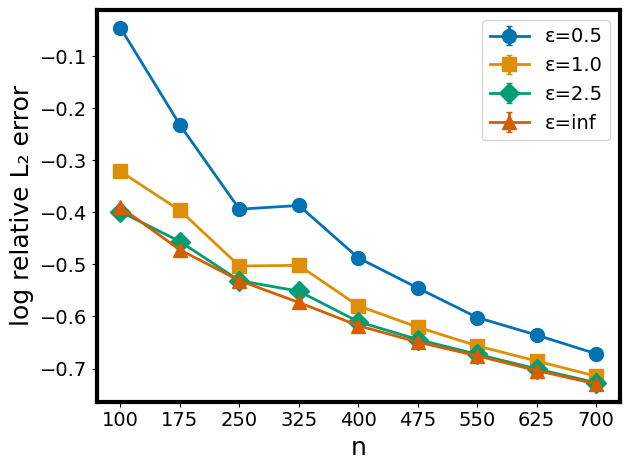

In [37]:
df_p        = df.xs(p_fixed, level='p').reset_index()
pivot_mean  = df_p.pivot(index='n', columns='eps', values='relative_l2_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('n')
plt.ylabel('log relative L₂ error')
plt.xticks(n_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('l_2_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 1.2 L-inf loss

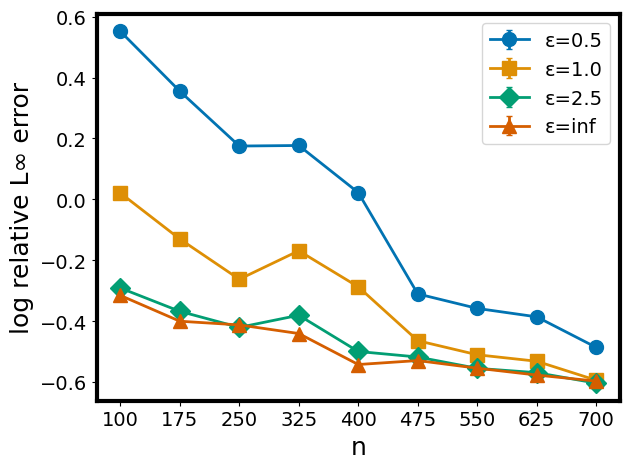

In [38]:
df_p        = df.xs(p_fixed, level='p').reset_index()
pivot_mean  = df_p.pivot(index='n', columns='eps', values='relative_l_inf_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('n')
plt.ylabel('log relative L∞ error')
plt.xticks(n_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('l_inf_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 1.3 Hamming loss via estimation

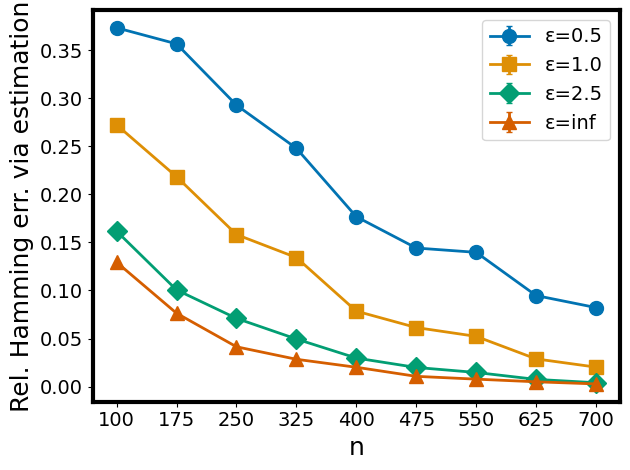

In [39]:
df_p        = df.xs(p_fixed, level='p').reset_index()
pivot_mean  = df_p.pivot(index='n', columns='eps', values='hit_at_k_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('n')
plt.ylabel('Rel. Hamming err. via estimation')
plt.xticks(n_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('hamming_loss_via_estimation.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 1.4 Hamming loss via counting

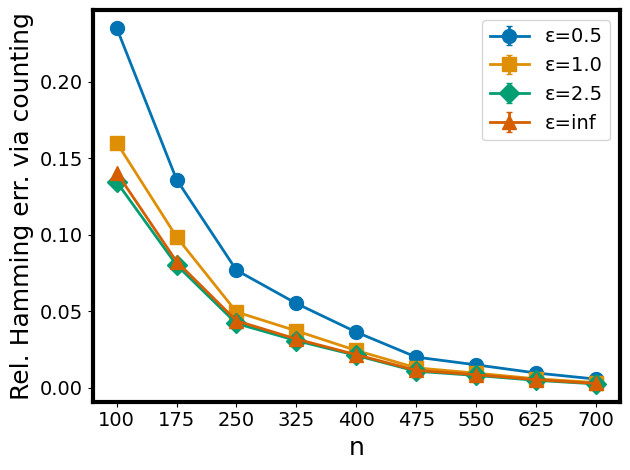

In [40]:
df_p        = df.xs(p_fixed, level='p').reset_index()
pivot_mean  = df_p.pivot(index='n', columns='eps', values='hit_at_k_by_count_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('n')
plt.ylabel('Rel. Hamming err. via counting')
plt.xticks(n_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('hamming_loss_via_counting.pdf', format='pdf', bbox_inches='tight')
plt.show()

## 2. Varying sampling probability

In [42]:
os.chdir("../accuracy-vs-p")

In [43]:
l2_df = make_row_mean(idx, "relative_l2_mean", pd.read_csv("L-2-error-priv.csv"))
l_inf_df = make_row_mean(idx, "relative_l_inf_mean", pd.read_csv("L-infty-error-priv.csv"))
hamming_estimation_df = make_row_mean(idx, "hit_at_k_mean", pd.read_csv("hamming-error-est-priv.csv"))
hamming_counting_df = make_row_mean(idx, "hit_at_k_by_count_mean", pd.read_csv("hamming-error-count-priv.csv"))

In [44]:
dfs = [l2_df, l_inf_df, hamming_estimation_df, hamming_counting_df]

In [67]:
df = pd.concat(dfs, axis=1, join='inner')

In [68]:
df.index = pd.MultiIndex.from_frame(
    df.index
      .to_frame()
      .assign(epsilon=lambda d: d['epsilon'].replace(1000, float('inf')))
      .rename(columns={'epsilon':'eps'})
)

In [69]:
n_fixed = 300
p_values, eps_values = [sorted(df.index.get_level_values(level).unique()) for level in ['p', 'eps']]

In [71]:
p_values = [0.1, 0.25, 0.4, 0.625, 0.85, 1.0]

In [72]:
df = df.loc[(slice(None), p_values, slice(None)), :]

### 2.1 L2 loss

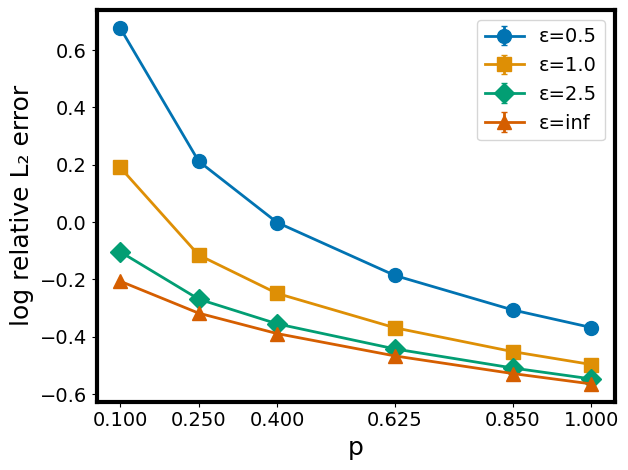

In [73]:
df_n        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_n.pivot(index='p', columns='eps', values='relative_l2_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('p')
plt.ylabel('log relative L₂ error')
plt.xticks(p_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('l_2_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 2.2 L-inf loss

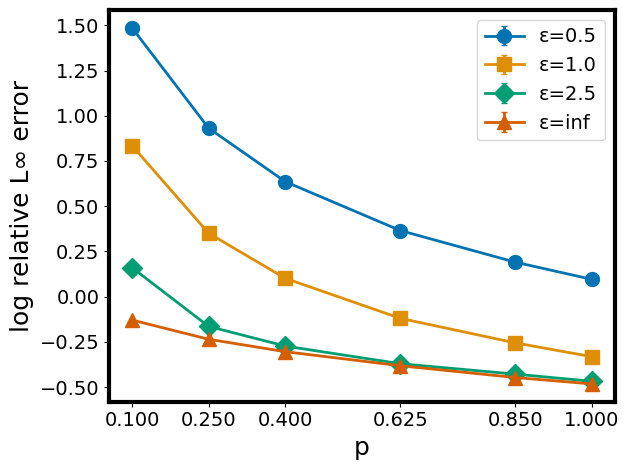

In [74]:
df_n        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_n.pivot(index='p', columns='eps', values='relative_l_inf_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('p')
plt.ylabel('log relative L∞ error')
plt.xticks(p_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('l_inf_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

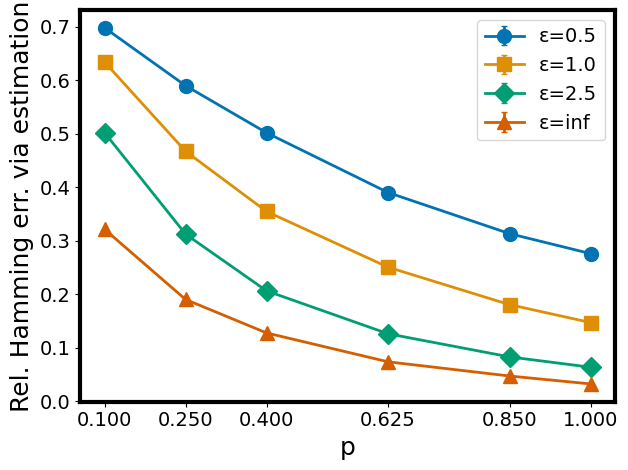

In [75]:
df_n        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_n.pivot(index='p', columns='eps', values='hit_at_k_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('p')
plt.ylabel('Rel. Hamming err. via estimation')
plt.xticks(p_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('hamming_loss_via_estimation.pdf', format='pdf', bbox_inches='tight')
plt.show()

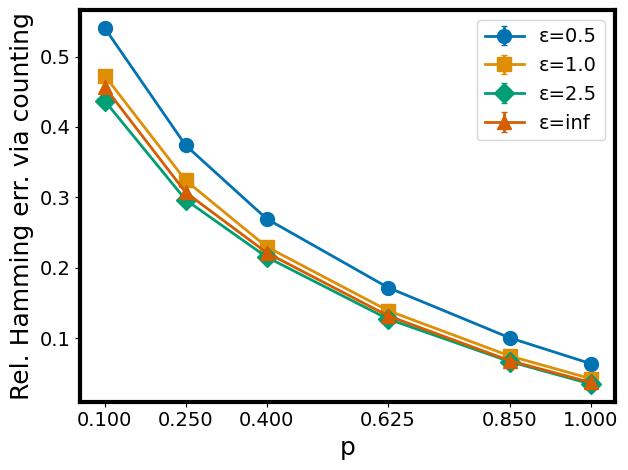

In [76]:
df_n        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_n.pivot(index='p', columns='eps', values='hit_at_k_by_count_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.5: 'o',   # circle
    1: 's',   # square
    2.5: 'D',   # diamond
    float('inf'): '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for eps in eps_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[eps],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[eps],
        markersize=marker_size,
        linestyle='-',
        label=f'ε={eps}',
        capsize=2
    )

plt.xlabel('p')
plt.ylabel('Rel. Hamming err. via counting')
plt.xticks(p_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('hamming_loss_via_counting.pdf', format='pdf', bbox_inches='tight')
plt.show()

## 3. Varying privacy level

In [96]:
os.chdir("../accuracy-vs-epsilon")

In [97]:
l2_df = make_row_mean(idx, "relative_l2_mean", pd.read_csv("L-2-error-priv.csv"))
l_inf_df = make_row_mean(idx, "relative_l_inf_mean", pd.read_csv("L-infty-error-priv.csv"))
hamming_estimation_df = make_row_mean(idx, "hit_at_k_mean", pd.read_csv("hamming-error-est-priv.csv"))
hamming_counting_df = make_row_mean(idx, "hit_at_k_by_count_mean", pd.read_csv("hamming-error-count-priv.csv"))

In [120]:
dfs = [l2_df, l_inf_df, hamming_estimation_df, hamming_counting_df]

In [131]:
df = pd.concat(dfs, axis=1, join='inner')

In [132]:
df.index = pd.MultiIndex.from_frame(
    df.index
      .to_frame()
      .assign(epsilon=lambda d: d['epsilon'].replace(1000, float('inf')))
      .rename(columns={'epsilon':'eps'})
)

In [123]:
n_fixed = 300
p_values, eps_values = [sorted(df.index.get_level_values(level).unique()) for level in ['p', 'eps']]

In [124]:
eps_values

[0.2, 0.25, 0.333333333333333, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, inf]

In [133]:
eps_values = [0.2, 0.5, 1.0, 2.0, 2.5, 5.0]

In [134]:
df = df.loc[(slice(None), slice(None), eps_values), :]

### 3.1 L2 loss

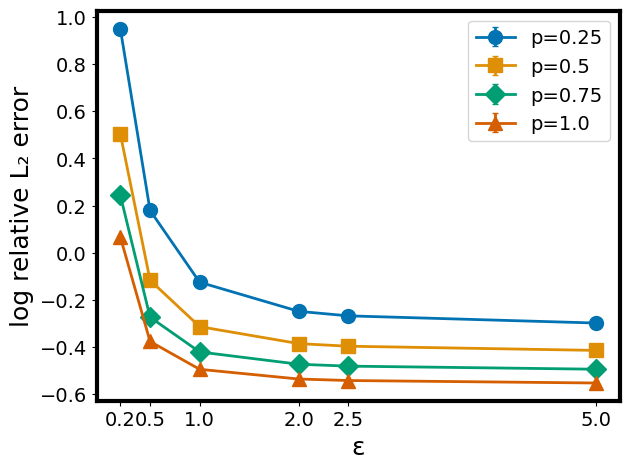

In [135]:

df_eps        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_eps.pivot(index='eps', columns='p', values='relative_l2_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.25: 'o',   # circle
    0.5: 's',   # square
    0.75: 'D',   # diamond
    1.0: '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for p in p_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[p],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[p],
        markersize=marker_size,
        linestyle='-',
        label=f'p={p}',
        capsize=2
    )

plt.xlabel('ε')
plt.ylabel('log relative L₂ error')
plt.xticks(eps_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('l_2_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

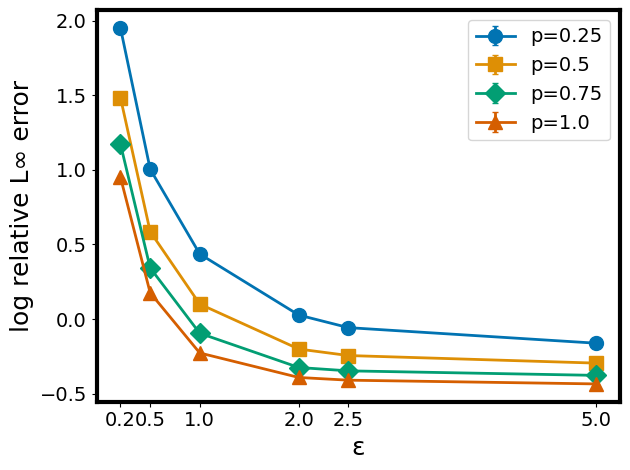

In [136]:

df_eps        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_eps.pivot(index='eps', columns='p', values='relative_l_inf_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.25: 'o',   # circle
    0.5: 's',   # square
    0.75: 'D',   # diamond
    1.0: '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for p in p_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[p],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[p],
        markersize=marker_size,
        linestyle='-',
        label=f'p={p}',
        capsize=2
    )

plt.xlabel('ε')
plt.ylabel('log relative L∞ error')
plt.xticks(eps_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('l_inf_loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 3.3 Hamming loss via estimation

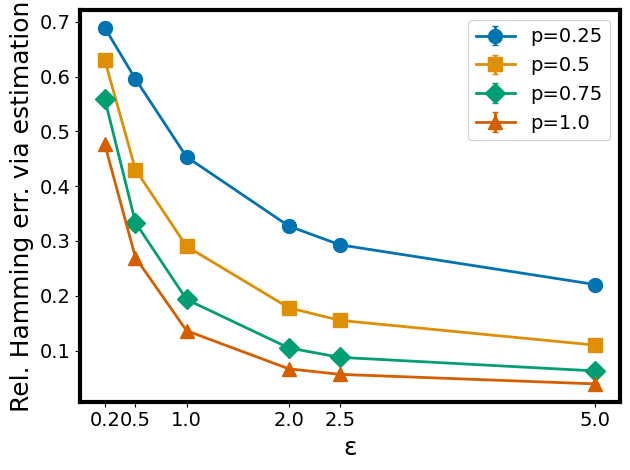

In [137]:

df_eps        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_eps.pivot(index='eps', columns='p', values='hit_at_k_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.25: 'o',   # circle
    0.5: 's',   # square
    0.75: 'D',   # diamond
    1.0: '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for p in p_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[p],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[p],
        markersize=marker_size,
        linestyle='-',
        label=f'p={p}',
        capsize=2
    )

plt.xlabel('ε')
plt.ylabel('Rel. Hamming err. via estimation')
plt.xticks(eps_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('hamming_loss_via_estimation.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 3.4 Hamming loss via counting

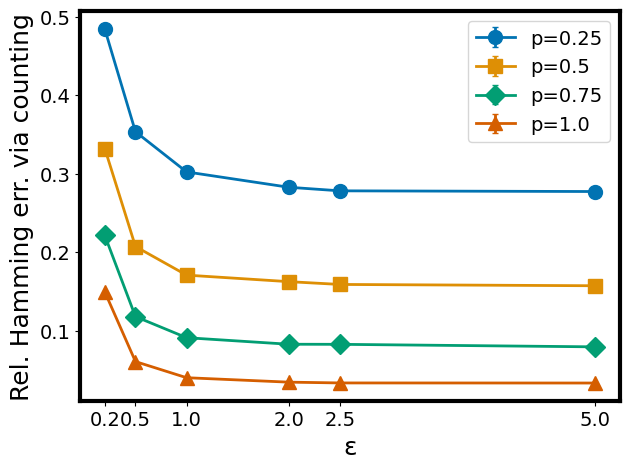

In [138]:

df_eps        = df.xs(n_fixed, level='n').reset_index()
pivot_mean  = df_eps.pivot(index='eps', columns='p', values='hit_at_k_by_count_mean')

# configure color-blind-friendly palette and thicker lines
cmap = plt.get_cmap('Set2')
plt.rcParams['axes.prop_cycle'] = cycler('color', sns.color_palette('colorblind'))
plt.rcParams['lines.linewidth'] = 2

# define a distinct marker for each ε and a larger marker size
markers = {
    0.25: 'o',   # circle
    0.5: 's',   # square
    0.75: 'D',   # diamond
    1.0: '^'  # triangle_up
}

plt.rcParams.update({
    'axes.linewidth': 3,       # thicker axis lines
    'axes.labelsize': 18,        # x/y label font size
    'xtick.labelsize': 14,       # x-tick label size
    'ytick.labelsize': 14,       # y-tick label size
    'legend.fontsize': 14        # legend text size
})

marker_size = 10

# assume pivot_mean, pivot_std, n_values, eps_values are already defined
for p in p_values:
    plt.errorbar(
        pivot_mean.index,
        pivot_mean[p],
        #yerr=pivot_std[eps],
        yerr = 0,
        marker=markers[p],
        markersize=marker_size,
        linestyle='-',
        label=f'p={p}',
        capsize=2
    )

plt.xlabel('ε')
plt.ylabel('Rel. Hamming err. via counting')
plt.xticks(eps_values)      # x-ticks at the actual n values
#plt.ylim(bottom=0)         # y-axis starts at 0
plt.legend()               # legend with different markers
plt.tight_layout()
plt.savefig('hamming_loss_via_counting.pdf', format='pdf', bbox_inches='tight')
plt.show()